##### 1. Import the dataset

In [1]:
import pandas as pd

# dataset from https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection
df = pd.read_table(r'C:\Users\athiq.ahmed\Desktop\Other\Python code\ML\Text data analysis\Datasets\SMSSpamCollection',
                  sep = '\t',
                  header = None,
                  names = ['label','sms_messages'])


In [2]:
df.head()

,label,sms_messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


##### 1.1 Process the dataset

We need to transform the labels to binary values so we can run the regression. Here 1 = "spam" and 0 = "ham"

In [3]:
df['label'] = df.label.map({'ham':0, 'spam':1})
df.head()

,label,sms_messages
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


##### 2.1 Enter bag of words

Since we're dealing with text data and the naive bayes classifier is better suited to having numerical data as inputs we will need to perform transformations. To accomplish this we'll use the ("bag of words")[https://en.wikipedia.org/wiki/Bag-of-words_model] method to count the frequency of occurance for each word. Note: the bag of word methods assumes equal weight for all words in our "bag" and does not consider the order of occurance for words.

There are modules that will do this for us but we will implement bag of words from scratch to understand what's happening under the hood.

The steps are as follow: 
1. Convert bag of words to lowercase. 
2. Remove punctuation from sentences. 
3. Break on each word. 
4. Count the frequency of each word.

##### Bag of words from scratch

In [9]:
import string # puntuation
import pprint
from collections import Counter # frequencies

documents = ['Hello, how are you!',
             'Win money, win from home.',
             'Call me now.',
             'Hello, Call hello you tomorrow?'];documents

['Hello, how are you!',
 'Win money, win from home.',
 'Call me now.',
 'Hello, Call hello you tomorrow?']

##### 1. Convert bag of words to lowercase. 

In [20]:
lower_case_documents = []

for i in documents:
    lower_case_documents.append(i.lower())

print("lower case: ",lower_case_documents)

lower case:  ['hello, how are you!', 'win money, win from home.', 'call me now.', 'hello, call hello you tomorrow?']


##### 2. Remove punctuation from sentences. 

In [33]:
sans_punctuation_documents = []

for i in lower_case_documents:
    sans_punctuation_documents = ["".join(j for j in i if j not in string.punctuation)  for i in lower_case_documents]
print("No punctuation: ", sans_punctuation_documents)

No punctuation:  ['hello how are you', 'win money win from home', 'call me now', 'hello call hello you tomorrow']


##### 3. Break on each word. 

In [34]:
preprocessed_documents = []

for i in sans_punctuation_documents:
    preprocessed_documents.append(i.split())
print("Break words: ", preprocessed_documents)

Break words:  [['hello', 'how', 'are', 'you'], ['win', 'money', 'win', 'from', 'home'], ['call', 'me', 'now'], ['hello', 'call', 'hello', 'you', 'tomorrow']]


##### 4. Count the frequency of each word.

In [48]:
frequency_list = []

for i in preprocessed_documents:
    frequency_counts = Counter(i)
    frequency_list.append(frequency_counts)
frequency_list
# print("tokenized counts: ", pprint.pprint(frequency_list))

[Counter({'hello': 1, 'how': 1, 'are': 1, 'you': 1}),
 Counter({'win': 2, 'money': 1, 'from': 1, 'home': 1}),
 Counter({'call': 1, 'me': 1, 'now': 1}),
 Counter({'hello': 2, 'call': 1, 'you': 1, 'tomorrow': 1})]

##### 2.2 SciKit-Learn Feature Extraction

In [61]:
documents

['Hello, how are you!',
 'Win money, win from home.',
 'Call me now.',
 'Hello, Call hello you tomorrow?']

In [67]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()   # set the variable

count_vector.fit(documents)        # fit the function
count_vector.get_feature_names     # get the outputs

print(count_vector)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)


Create an array where each row represents one of the 4 columns and each column represents the counts for each word within the document.

In [63]:
doc_array = count_vector.transform(documents).toarray()
doc_array

array([[1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 2, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1]], dtype=int64)

Convert the array to a data frame and apply get_feature_names as the column names.

In [65]:
frequency_matrix = pd.DataFrame(doc_array,columns = count_vector.get_feature_names())
frequency_matrix

,are,call,from,hello,home,how,me,money,now,tomorrow,win,you
0,1,0,0,1,0,1,0,0,0,0,0,1
1,0,0,1,0,1,0,0,1,0,0,2,0
2,0,1,0,0,0,0,1,0,1,0,0,0
3,0,1,0,2,0,0,0,0,0,1,0,1


##### 3.1 Training and Testing sets

In [69]:
df.head()

,label,sms_messages
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['sms_messages'],
                                                   df['label'],
                                                   random_state=1)

print ("Our original set contains", df.shape[0], "observations")
print ("Our training set contains", X_train.shape[0], "observations")
print ("Our testing set contains", X_test.shape[0], "observations")

Our original set contains 5572 observations
Our training set contains 4179 observations
Our testing set contains 1393 observations


Fit the training & testing data to the CountVectorizer() method and return a matrix

In [101]:
train = count_vector.fit_transform(X_train)
test = count_vector.transform(X_test)

In [102]:
test

<1393x7456 sparse matrix of type '<class 'numpy.int64'>'
	with 17604 stored elements in Compressed Sparse Row format>

##### 4.1 Implementing Baye's thorem from sctrach

Bayes' theorem calculates the probability of a given class or state given the joint-probability distribution of the input variables (betas).


Here we'll create a fictitious world in which we're testing patients for HIV.

    P(HIV) = The odds of a person having HIV is .015 or 1.5%
    P(Positive) = The probability the test results are positive
    P(Negative) = The probability the test results are negative.

    P(Positive | HIV) = The probability the test results are positive given someone has HIV. This is also called Sensitivity or True Positive Rate. We'll assume the test is correct .95 or 95% of the time.

    P(Positive | ~HIV) = The probability the test results are positive given someone does not have HIV. This is also called Specificity or True Negative Rate. We'll assume this is also correct .95 or 95% of the time.


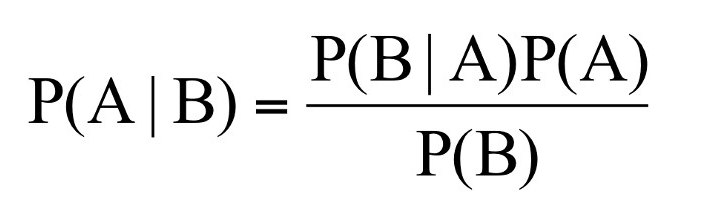

In [127]:
from IPython.display import Image
Image(filename=r'C:\Users\athiq.ahmed\Desktop\Other\Python code\ML\Text data analysis\Images\Bayes theorem.png'
      ,width="500")

Where: 
- P(A) is the probability of A occurring independently, for us this is P(HIV). 
- P(B) is the probability of B occurring independently, for us this is P(Positive). 
- P(A|B) is the posterior probability of A occurring given B occurs, for us this is P(HIV | Positive). This is the probability       that an individual has HIV given their test results are positive and what we're trying to calculate. 
- P(B|A) is the likelihood probability of B occurring, given A occurs. In our example this is P(Positive | HIV). This value is       given to us


Stringing these together we get:
- P(HIV | Positive) = ((P(HIV) * P(Positive | HIV)) / P(Positive)

Thus the probability of getting a positive HIV test result P(HIV) becomes:
- P(Positive) = [P(HIV) * Sensitivity] + [P(~HIV) * (1-Specificity)]

In [129]:
#performing calculations:


p_hiv = .015 #P(HIV) assuming 1.5% of the population has HIV

p_no_hiv = .98 # P(~HIV)

p_positive_hiv = .95 #sensitivity

p_negative_hiv = .95#specificity

#P(Positive)
p_positive = (p_hiv * p_positive_hiv) + (p_no_hiv * (1-p_negative_hiv))
print ("The probability of getting a positive test result is:", p_positive, "this is our prior")

The probability of getting a positive test result is: 0.06325000000000004 this is our prior


Using this prior we can calculate our posterior probabilities as follows:

The probability of an individual having HIV given their test result is positive.

P(D|Positive) = (P(HIV) * Sensitivity)) / P(Positive)

The probability of an individual not having HIV given their test result is positive.

P(~D|Positive) = (P(~HIV) * (1-Sensitivity))) / P(Positive)

Note: the sum of posteriors must equal one because combined they capture all possible states within our set of probabilities.

In [130]:
#P(HIV | Positive)
p_hiv_positive = (p_hiv * p_positive_hiv) / p_positive

print ("The probability of a person having HIV, given a positive test result is:", p_hiv_positive)

The probability of a person having HIV, given a positive test result is: 0.22529644268774687


In [131]:
#P(~HIV | Positive)
p_positive_no_hiv = 1 - p_positive_hiv
p_no_hiv_positive = (p_no_hiv * p_positive_no_hiv) / p_positive

print ("The probability of an individual not having HIV given getting a positive test result is:", p_no_hiv_positive)

The probability of an individual not having HIV given getting a positive test result is: 0.7747035573122532


In our toy example we showed that if an individual gets a positive test result the probability this individual has HIV is 22.5% and 77.5% that they do not have HIV. We can check the validity of our results by summing the probability of both cases:

In [132]:
posterior_sum = p_no_hiv_positive + p_hiv_positive
posterior_sum #sum to 1, looks good!

1.0

##### 5.1 Naive Bayes Classifier using Scikit-learn

Our spam classifier will use multinomial naive Bayes method from sklearn.nive_bayes. This method is well-suited for for discrete inputs (like word counts) whereas the Gaussian Naive Bayes classifier performs better on continuous inputs

In [92]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()         # call the method
naive_bayes.fit(train,y_train)        # train the classifier on the training dataset

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [104]:
predictions = naive_bayes.predict(test) #predic using the model on the testing set
predictions

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

##### 6.1 Evaluating the model

Accuracy: A ratio of correct predictions to the total number of predictions.

Precision: The proportion of messages which were correctly classified as spam. This is a ratio of true positives (messages classified as SPAM which actually are SPAM) to all positives (all messages classified as SPAM).

In [126]:
from sklearn.metrics import accuracy_score, precision_score, f1_score

print('accuracy_score:{} '.format(accuracy_score(y_test,predictions)))
print('precision_score:{} '.format(precision_score(y_test,predictions)))

accuracy_score:0.9885139985642498 
precision_score:0.9720670391061452 


https://etav.github.io/projects/spam_message_classifier_naive_bayes.html